# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
admission = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-09-10/college_admissions.csv')
admission |> head()

,super_opeid,name,par_income_bin,par_income_lab,attend,stderr_attend,attend_level,attend_sat,stderr_attend_sat,attend_level_sat,⋯,rel_apply_unwgt_instate,rel_apply_unwgt_oostate,stderr_rel_apply_unwgt_instate,stderr_rel_apply_unwgt_oostate,rel_att_cond_app_unwgt_instate,rel_att_cond_app_unwgt_oostate,public,flagship,tier,test_band_tier
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
1,1434,American University,10,0-20,0.001122447,1.203232e-04,0.001608675,0.001361366,0.0002363146,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private
2,1434,American University,30,20-40,0.001004590,9.407788e-05,0.001608675,0.002062297,0.0001668990,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private
3,1434,American University,50,40-60,0.001408010,8.235695e-05,0.001608675,0.001430209,0.0001503198,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private
4,1434,American University,65,60-70,0.001488406,9.200569e-05,0.001608675,0.001405334,0.0001653812,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private
5,1434,American University,75,70-80,0.001500972,7.657332e-05,0.001608675,0.001258549,0.0001305322,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private
6,1434,American University,85,80-90,0.001524228,6.132438e-05,0.001608675,0.001189626,0.0001114291,0.001536806,⋯,NA,NA,NA,NA,NA,NA,FALSE,FALSE,Highly selective private,Other Top 100 Private


This project focuses on the relationship between **parental income levels and college applications and admissions**. Data are derived from New York Times and github, classifying parental income into low-, middle-, and high-income groups, and exploratory data analysis of students' college acceptance rates, application behaviors, and their relationship to college tiers.

Through these 5 charts, the project shows the trends and inequalities. For example, **the ECDF charts** demonstrates the distribution of acceptance rates for students in different income groups, with a *clear rightward shift* in the high-income group showing the advantage of acceptance rates for higher income groups; **the heat map** provides a comparison of college application and acceptance rates for students in different income groups, *with higher acceptance rates for the higher-income cohorts and darker heatmap color blocks*, visualizing the trend of concentration of higher-income students in highly ranked colleges; and **the line and scatter chartss** further analyze the relationship between income and acceptance rates, demonstrating the differences in performance across university tiers, but it is worth noting that for the Vine schools, in addition to high acceptance rates in the high-income group, the *acceptance rate in the low-income group is also significantly higher than that of the middle-income group*, which contributes to social class mobility to a certain extent, and reflects the fairness of education.

,name,par_income_bin,attend,tier,par_income_group
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,American University,10.0,0.001122447,Highly selective private,Low Income
2,American University,30.0,0.001004590,Highly selective private,Low Income
3,American University,50.0,0.001408010,Highly selective private,Low Income
4,American University,65.0,0.001488406,Highly selective private,Middle Income
5,American University,75.0,0.001500972,Highly selective private,Middle Income
6,American University,85.0,0.001524228,Highly selective private,Middle Income
7,American University,92.5,0.001695167,Highly selective private,High Income
8,American University,95.5,0.002261346,Highly selective private,High Income
9,American University,96.5,0.002109482,Highly selective private,High Income


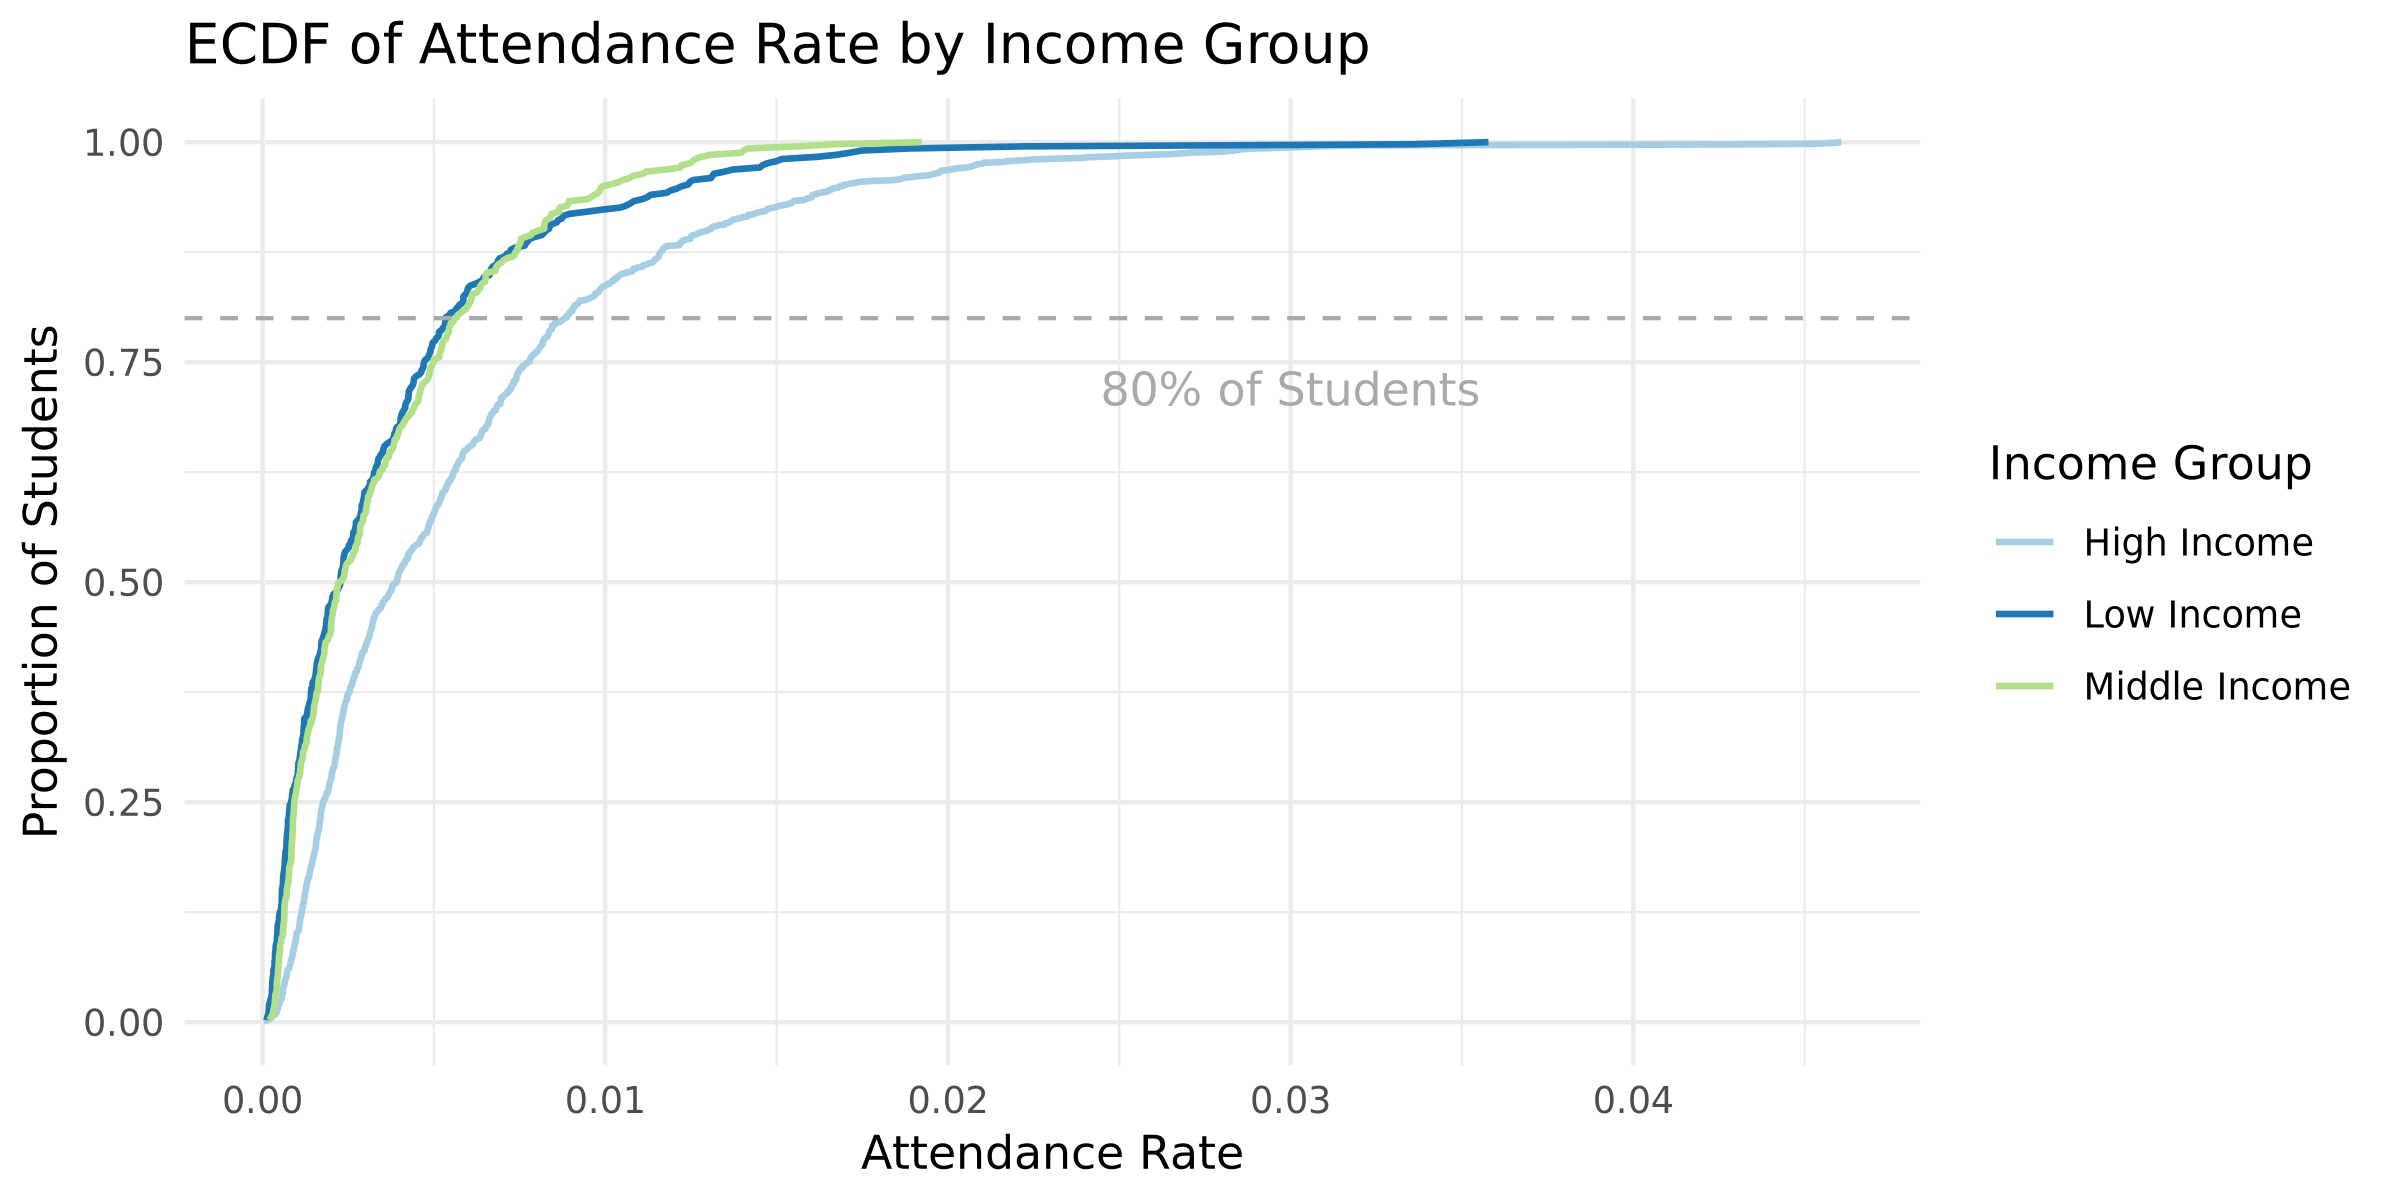

In [3]:
admission_grouped = admission |>  
    select(name, par_income_bin, attend, tier) |>
    mutate(par_income_group = case_when(
    par_income_bin <= 50 ~ "Low Income",
    par_income_bin > 50 & par_income_bin <= 90 ~ "Middle Income",
    par_income_bin > 90 ~ "High Income")) 
admission_grouped |> head(14)

admission_ecdf = admission_grouped |>
    group_by(par_income_group) |>
    mutate(cumulative_dist = cume_dist(attend)) |>
    ungroup()

ggplot(admission_ecdf, aes(x = attend, y = cumulative_dist, color = par_income_group)) +
    geom_line(na.rm = T, linewidth = 0.75) +
    scale_color_brewer(palette = "Paired") +
    geom_hline(yintercept = 0.8,linetype = "dashed",color = "darkgrey") +
    annotate("text", x = 0.03, y = 0.72, label = "80% of Students", color = "darkgrey") +
    theme_minimal() +
    labs(title = "ECDF of Attendance Rate by Income Group", x = "Attendance Rate", y = "Proportion of Students", color = "Income Group") 

name,tier,par_income_group,10,30,50,65,75,85,92.5,95.5,96.5,97.5,98.5,99.400002,99.5,100
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
American University,Highly selective private,Low Income,0.001122447,0.001004590,0.001408010,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
American University,Highly selective private,Middle Income,NA,NA,NA,0.001488406,0.001500972,0.001524228,NA,NA,NA,NA,NA,NA,NA,NA
American University,Highly selective private,High Income,NA,NA,NA,NA,NA,NA,0.001695167,0.002261346,0.002109482,0.002267590,0.002484247,0.003078112,0.003030860,0.002873795
Amherst College,Other elite schools (public and private),Low Income,0.002969041,0.003369981,0.002199345,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Amherst College,Other elite schools (public and private),Middle Income,NA,NA,NA,0.001495428,0.001111881,0.001348111,NA,NA,NA,NA,NA,NA,NA,NA
Amherst College,Other elite schools (public and private),High Income,NA,NA,NA,NA,NA,NA,0.001161548,0.001864550,0.001506576,0.001909153,0.003304858,0.003509958,0.003776848,0.005377047


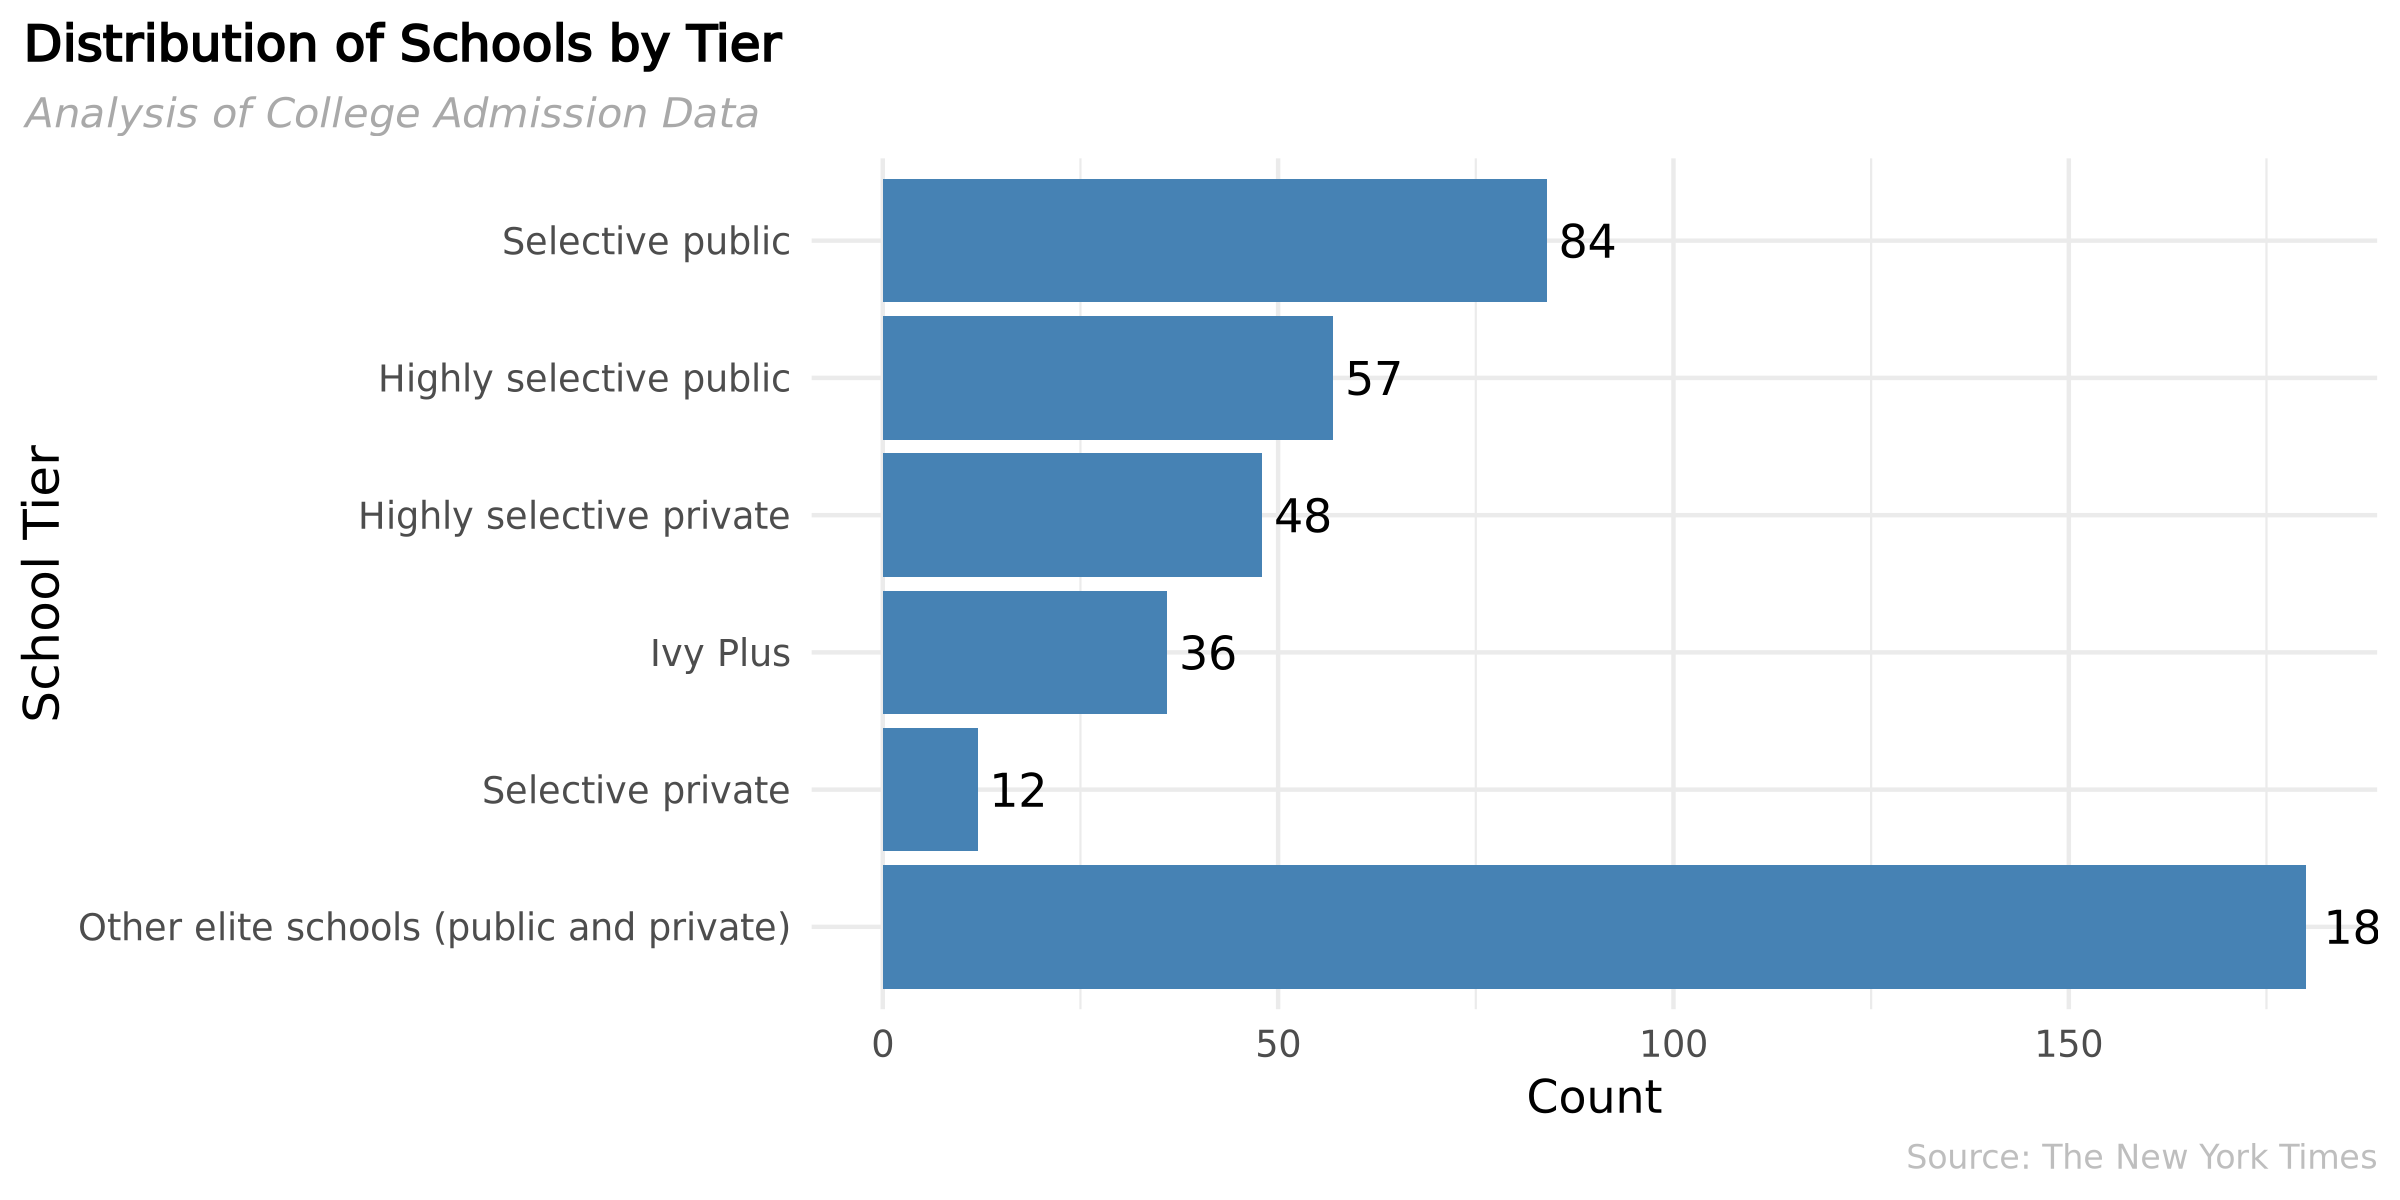

In [4]:
admission_wider = admission_grouped |> 
    pivot_wider(names_from = par_income_bin, values_from = attend, id_cols = c(name, tier, par_income_group))
admission_wider |> head()

admission_wider |>
    mutate(tier = fct_infreq(tier) |>
           fct_relevel('Other elite schools (public and private)' , after = Inf) |>
           fct_rev()) |>
ggplot(aes(y = tier)) + 
    geom_bar(fill = "steelblue") +
    geom_text(stat = "count", aes(label = after_stat(count)), hjust = -0.2) + 
    labs(x = "Count", 
         y = "School Tier",  
         title = "Distribution of Schools by Tier",
         subtitle = "Analysis of College Admission Data",
         caption = "Source: The New York Times") +
    theme_minimal() +
    theme(plot.title.position = 'plot',
          plot.caption.position = "plot",
          plot.title = element_text(color = 'black', face = 'bold',size = 12),
          plot.subtitle = element_text(color = 'darkgrey', face = "italic", size = 10),
          plot.caption = element_text(color = 'grey', size = 8),
          axis.title.y = element_text(size = 12)) 

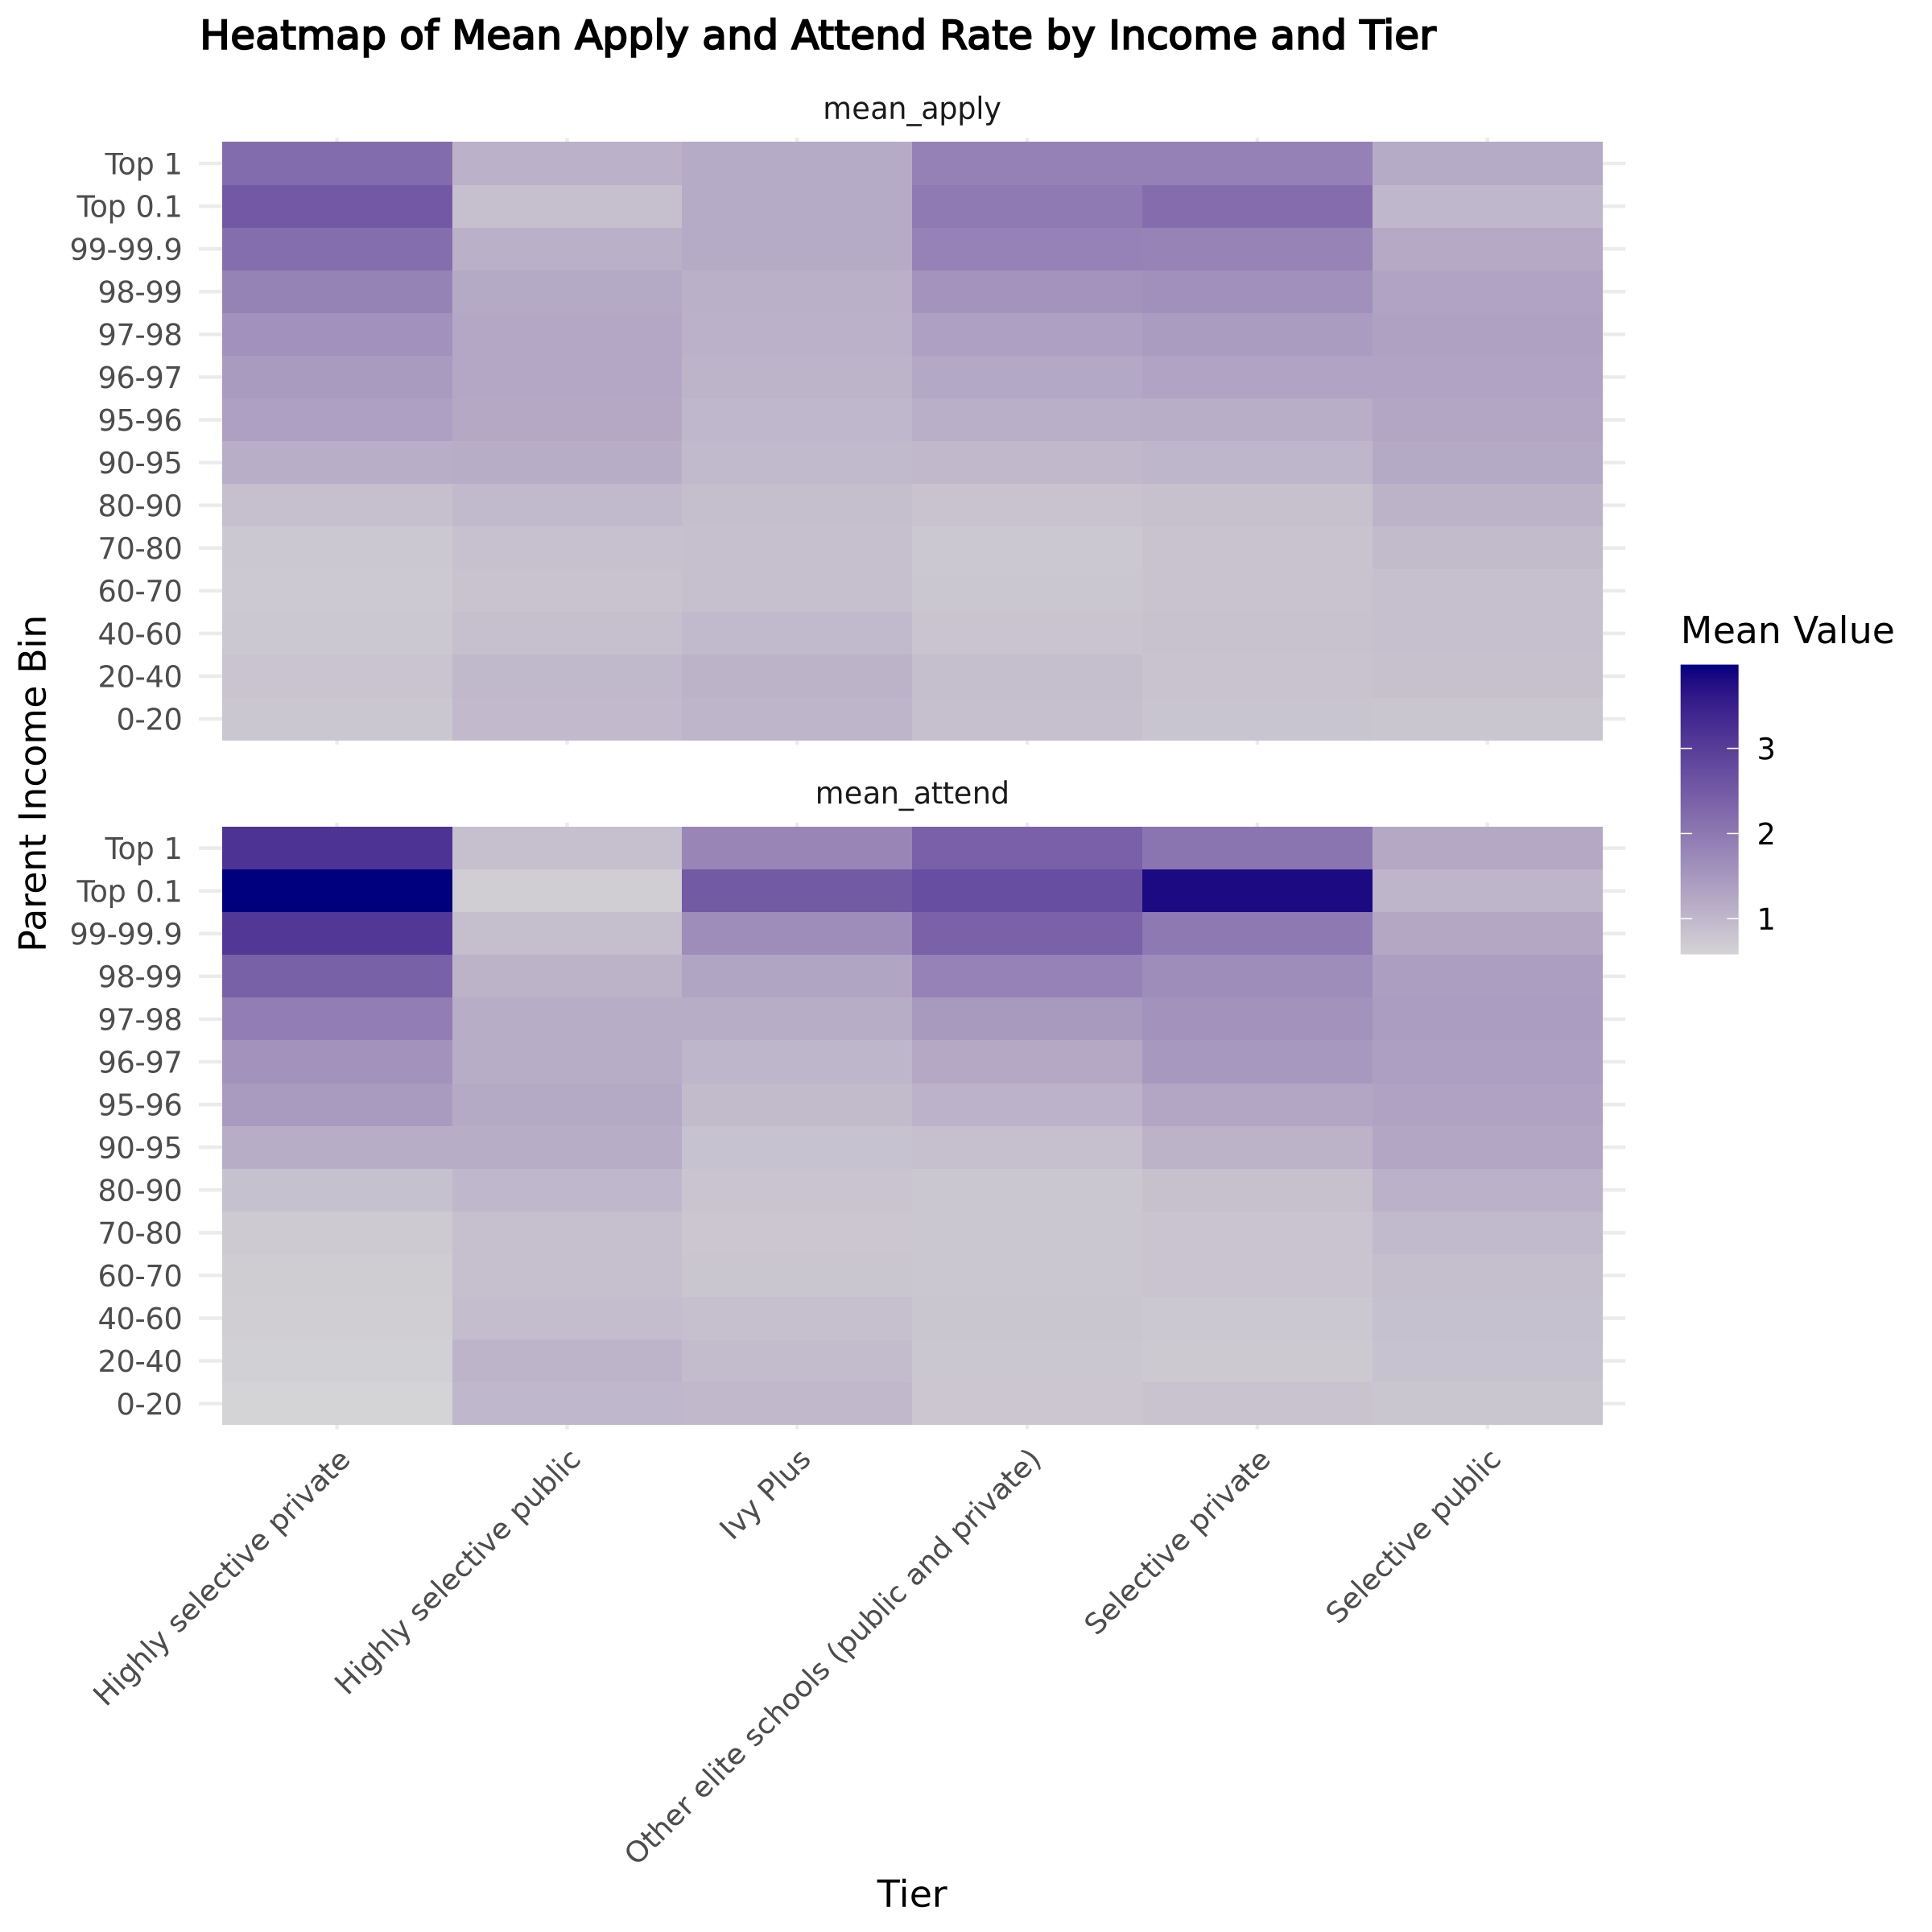

In [5]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 300)
admission |>
    group_by(par_income_lab, tier) |>
    summarize(mean_apply = mean(rel_apply, na.rm = TRUE), mean_attend = mean(rel_attend, na.rm = TRUE), .groups="drop") |>
    pivot_longer(cols = c (mean_apply, mean_attend)) |>
ggplot(aes(x = tier, y = par_income_lab, fill = value)) + 
    geom_tile() +
    facet_wrap(~name, ncol = 1, scale = 'free_y') +
    scale_fill_gradient(low = "#d4d3d5", high = "#00007f") +
    labs(title = "Heatmap of Mean Apply and Attend Rate by Income and Tier",
         x = "Tier",
         y = "Parent Income Bin",
         fill = "Mean Value") +
    theme_minimal()+
    theme(plot.title = element_text(color = 'black', face = 'bold',size = 12),
          axis.text.x = element_text(angle = 45, hjust = 1))

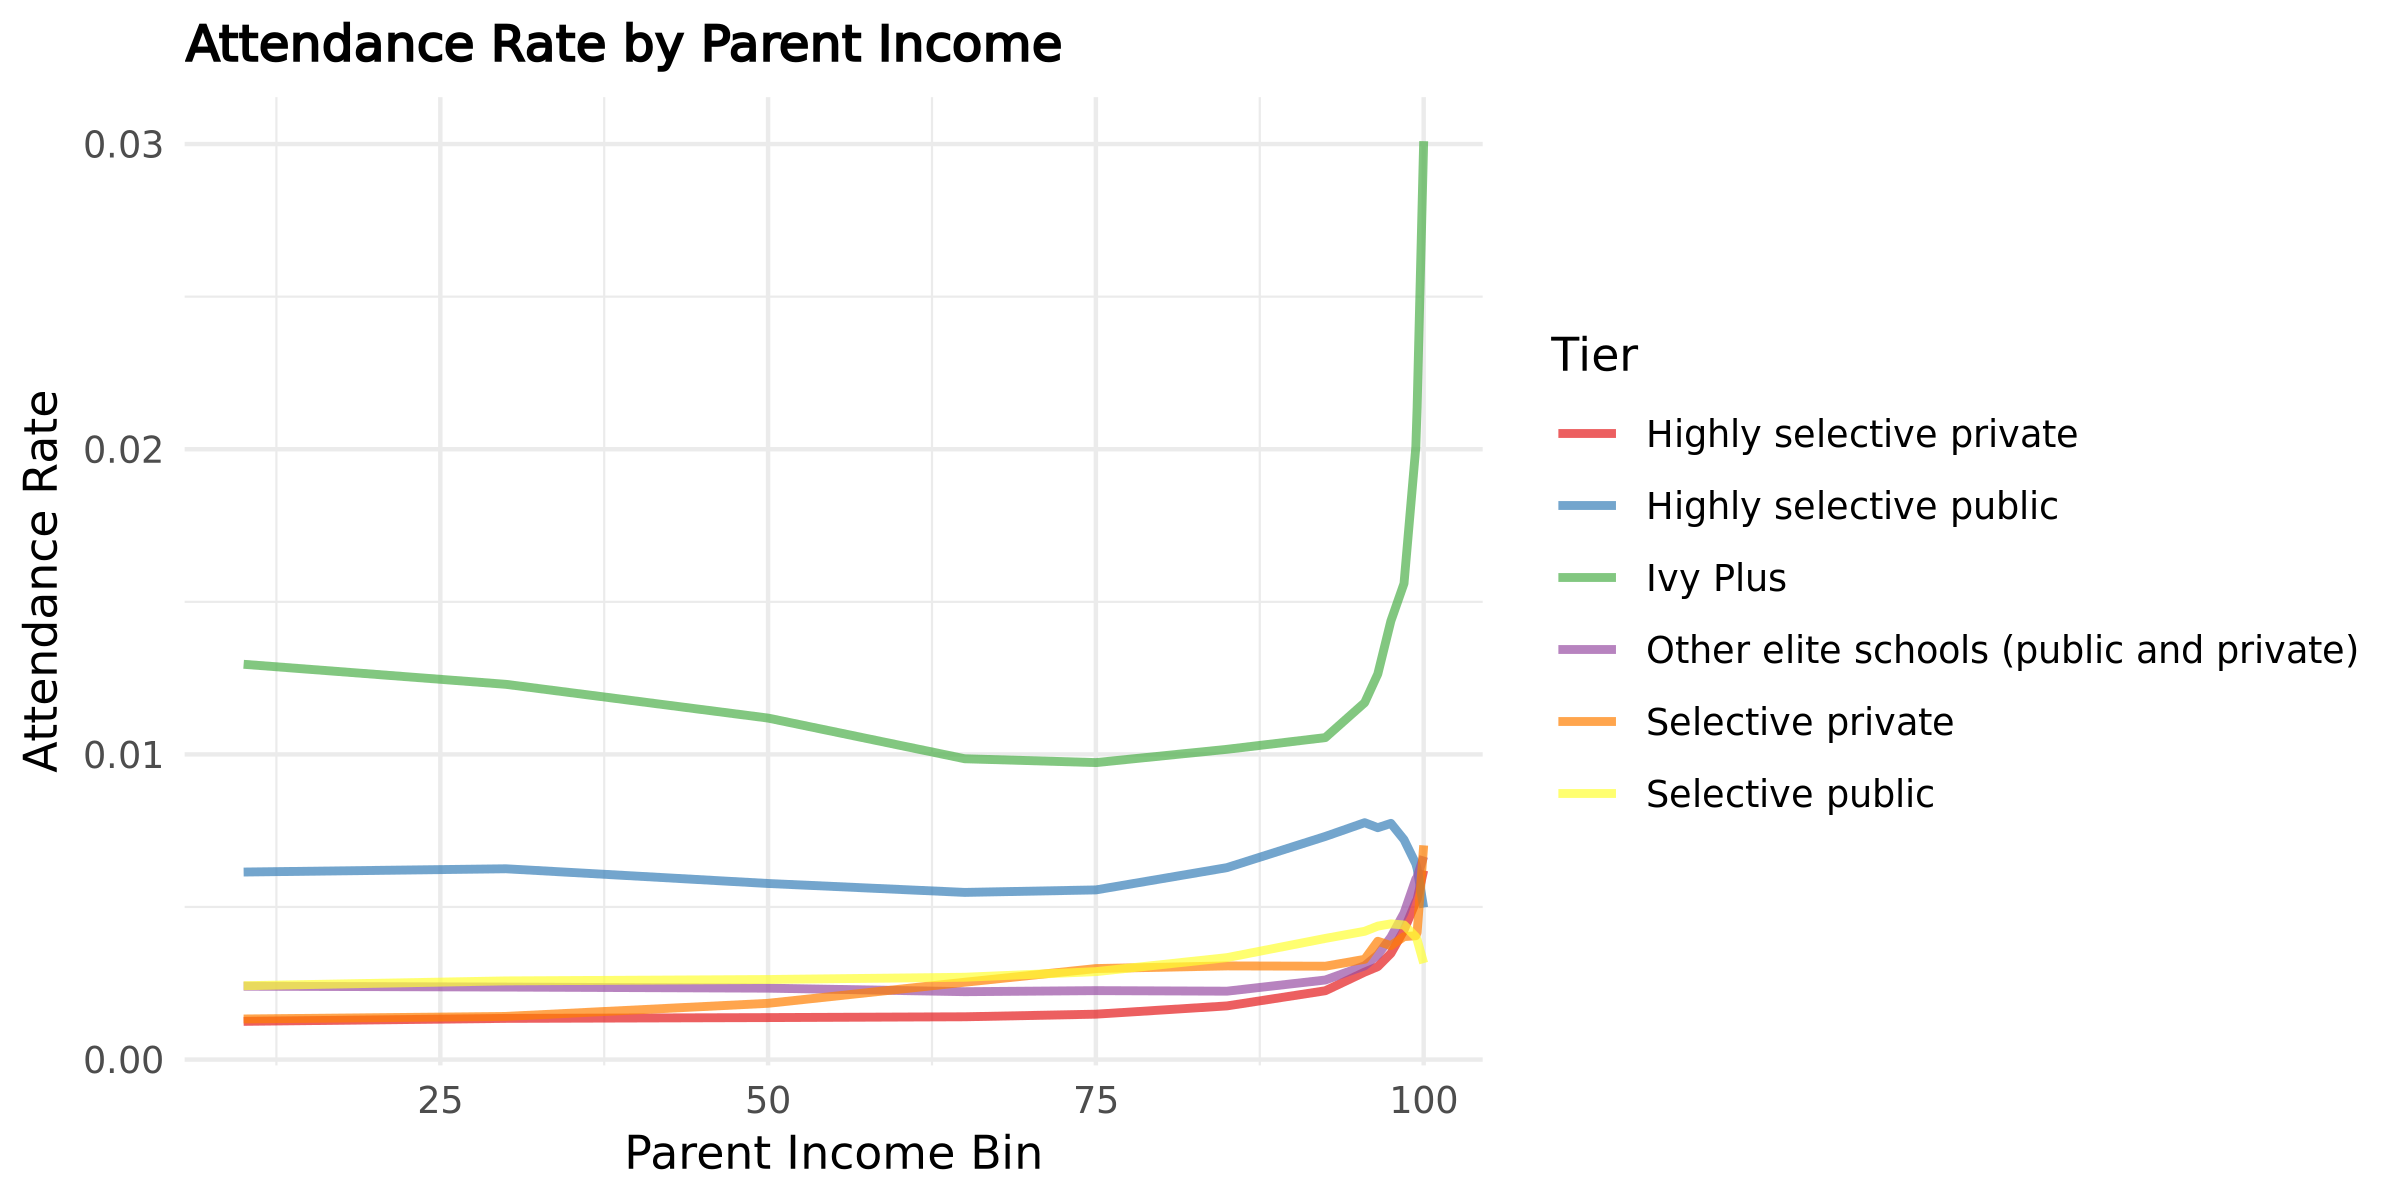

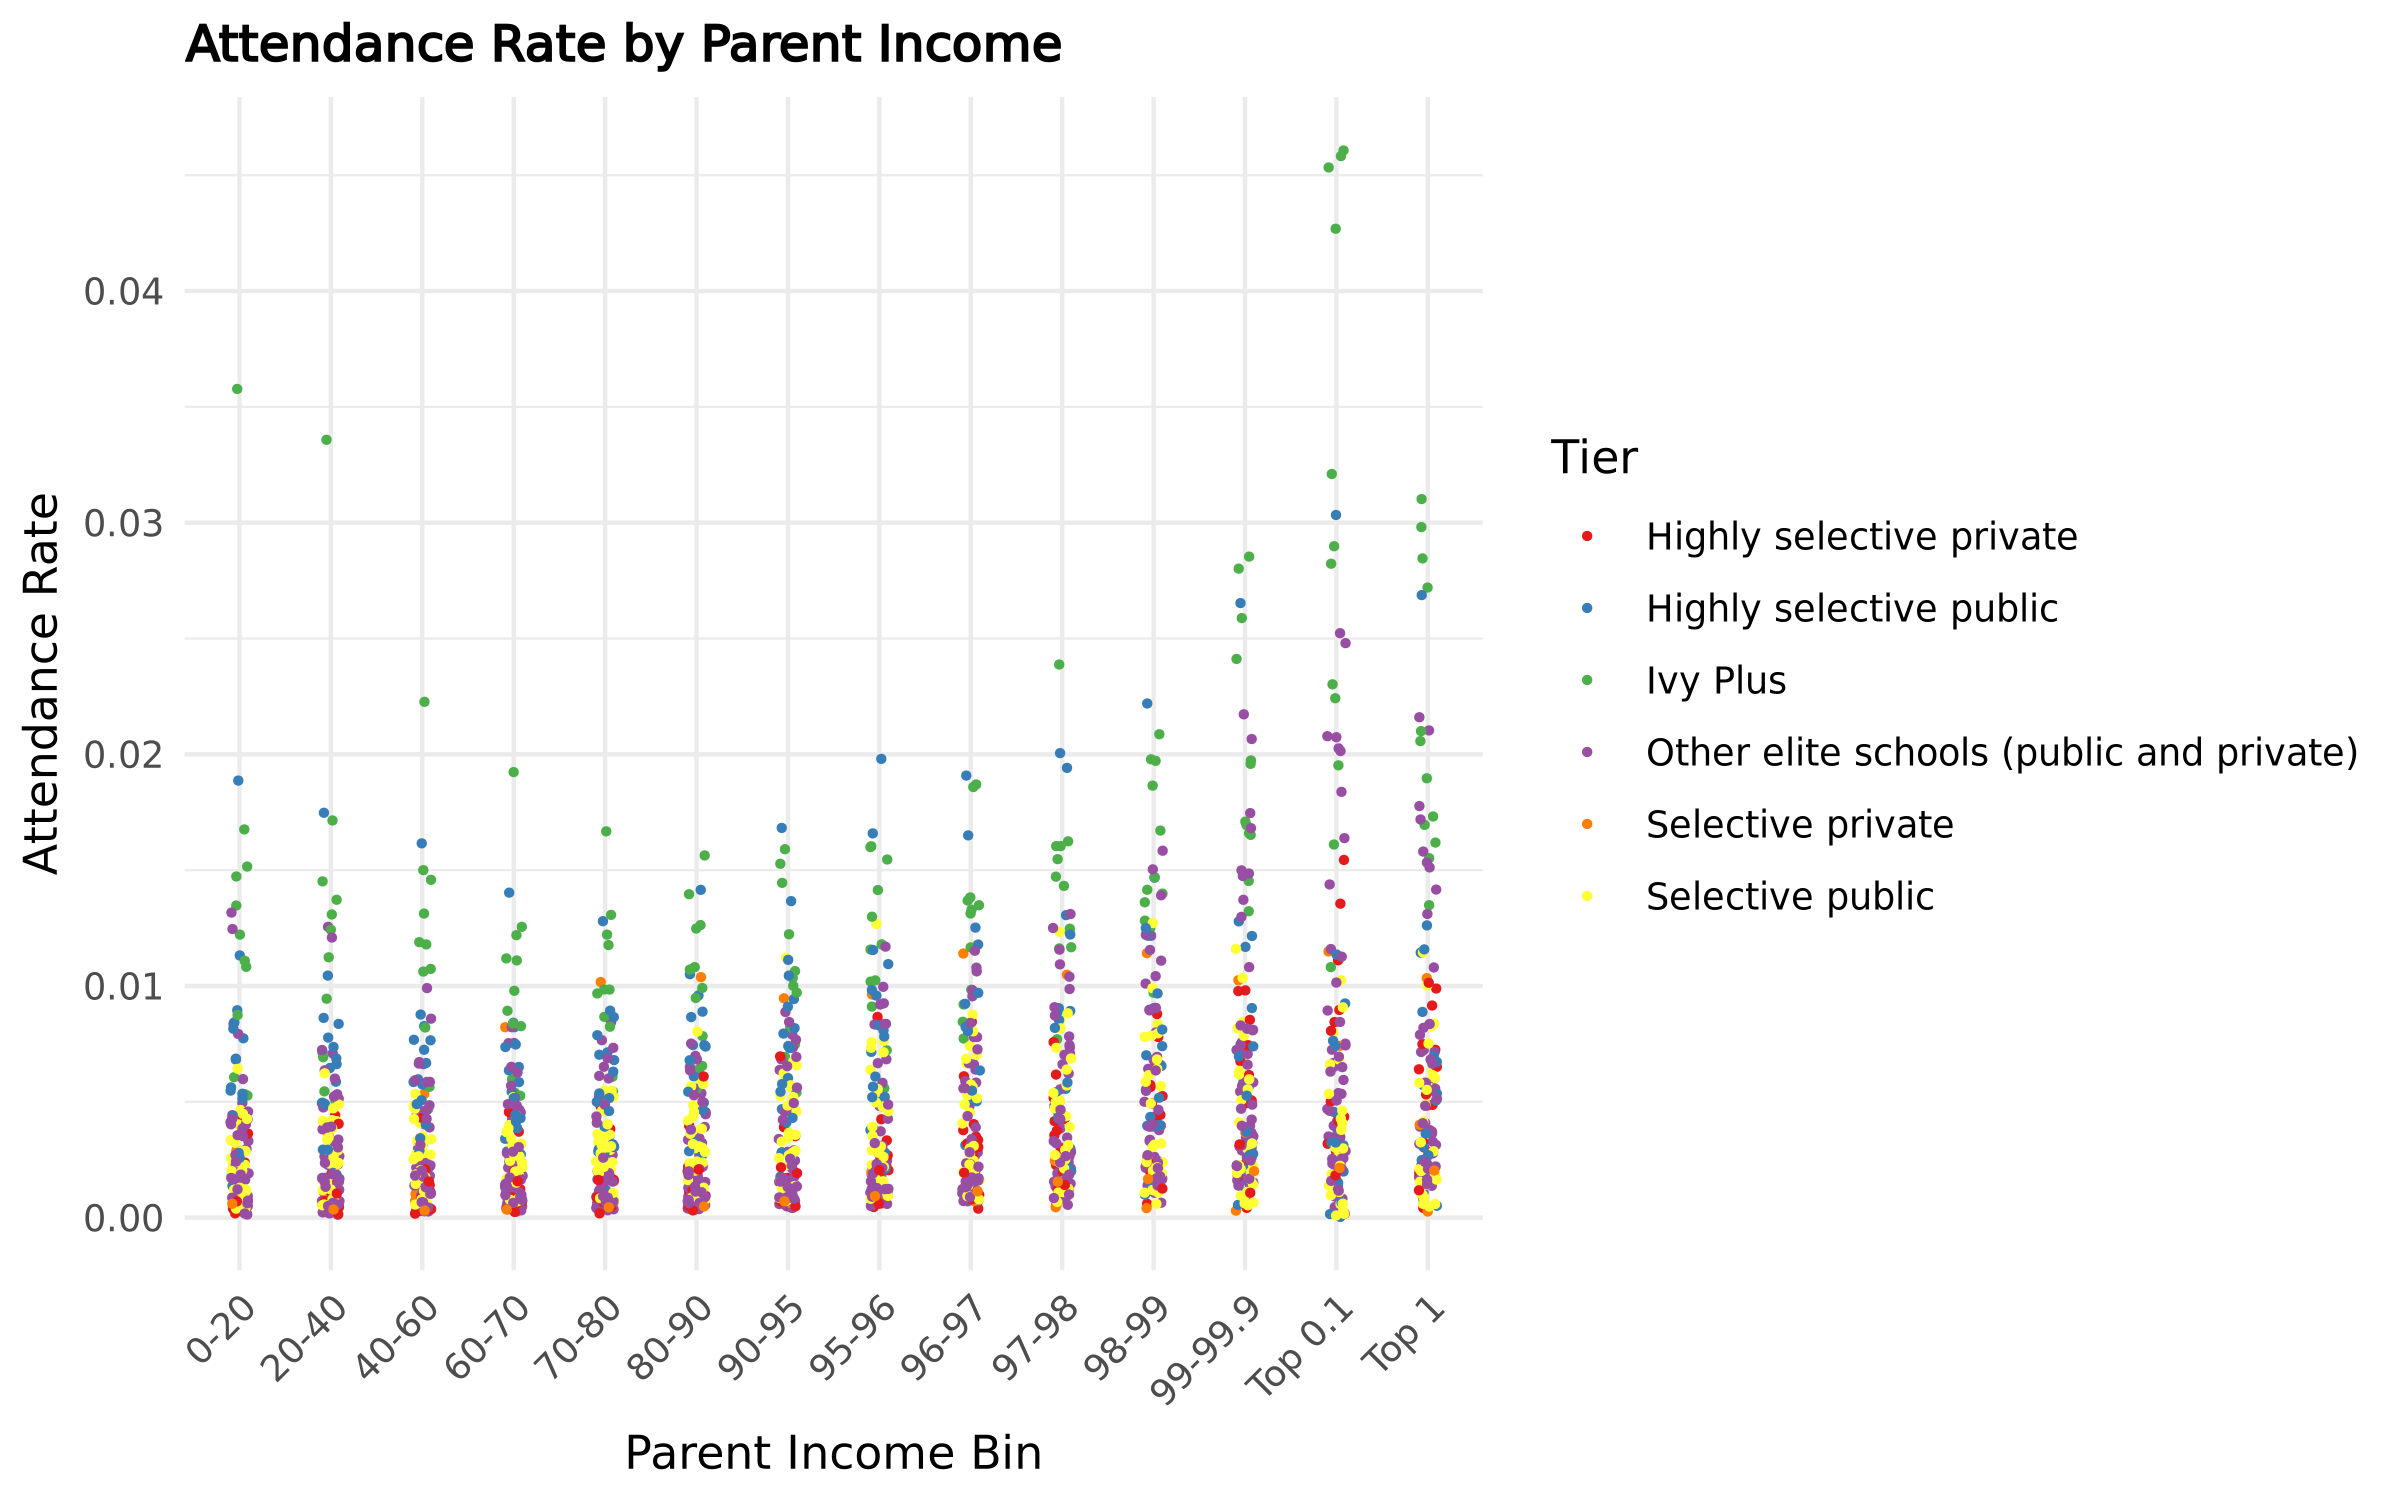

In [6]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 300)
admission |>
    group_by(par_income_bin, tier) |>
    summarize(mean_attend = mean(attend, na.rm = TRUE), .groups = "drop") |>
ggplot(aes(x = par_income_bin, y = mean_attend, color = tier)) +
    geom_line(linewidth = 1, alpha = 0.7) +  
    scale_color_brewer(palette = "Set1") +
    labs(title = "Attendance Rate by Parent Income",
         x = "Parent Income Bin",
         y = "Attendance Rate",
         color = "Tier") +
    theme_minimal()+
    theme(plot.title = element_text(color = 'black', face = 'bold',size = 12))

options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(admission, aes(x = par_income_lab, y = attend, color = tier)) +
    geom_point(na.rm = TRUE, size = 0.5, position = position_jitter(width = 0.1, height = 0)) +
    scale_color_brewer(palette = "Set1") +
    labs(title = "Attendance Rate by Parent Income",
         x = "Parent Income Bin",
         y = "Attendance Rate",
         color = "Tier") +
    theme_minimal() +
    theme(plot.title = element_text(color = 'black', face = 'bold',size = 12),
          axis.text.x = element_text(angle = 45, hjust = 1))